## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [103]:
# Basic Import
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

## Modelling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings

In [104]:
df=pd.read_csv("data/updated_stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [105]:
df.drop(["math_score"],axis=1,inplace=True)
df.drop(["reading_score"],axis=1,inplace=True)
df.drop(["writing_score"],axis=1,inplace=True)

In [106]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total_score,average
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333


#### Preparing X and Y variables

In [107]:
X = df.drop(columns=["total_score"],axis=1)

In [108]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,average
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [109]:
y = df["total_score"]
y

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

In [110]:
print("Categories in 'gender' variable:   ",end=" ")
print(df["gender"].unique())

print("Categories in 'race_ethnicity' variable:   ",end=" ")
print(df["race_ethnicity"].unique())

print("Categories in 'parental_level_of_education' variable:   ",end=" ")
print(df["parental_level_of_education"].unique())

print("Categories in 'lunch' variable:   ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test_preparation_course' variable:   ",end=" ")
print(df["test_preparation_course"].unique())

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:    ['none' 'completed']


In [111]:
## create column transformer with 3 type of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [112]:
X = preprocessor.fit_transform(X)

In [113]:
X.shape

(1000, 18)

In [114]:
## seperate data set into train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=.20,random_state=42)
X_train.shape ,X_test.shape

((800, 18), (200, 18))

#### Create an Evaluate Function to give all metrics after model Training

In [115]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [116]:
models={
    "Liner Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Elastic Net": ElasticNet(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "SVM": SVR(),
    "XGBRegressor": XGBRegressor(),
    "Catboosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regresssor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)  ## Train model

    #Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    ## Evaluate Train And Test Dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Liner Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.000000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0090
- Mean Absolute Error: 0.807502
- R2 Score: 0.9994
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0557
- Mean Absolute Error: 0.8312
- R2 Score: 0.9994


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0623
- Mean Absolute Error: 0.050716
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0684
- Mean Absolute Error: 0.0536
- R2 Score: 1.0000


Elastic Net
Model performance for Training set
- Root Mean Squared Error: 14.4130
- Mean Absolute Error: 11.536462
- R2 Score: 0.8843
------------------------

### Results

In [117]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Liner Regression,1.000000
2,Ridge,0.999998
1,Lasso,0.999422
5,Decision Tree Regressor,0.997719
8,XGBRegressor,0.997708
6,Random Forest Regressor,0.996292
10,AdaBoost Regresssor,0.990501
9,Catboosting Regressor,0.988599
4,K-Neighbors Regressor,0.879337
3,Elastic Net,0.877043


## Linear Regression

In [118]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %score)


 Accuracy of the model is 100.00


## Plot y_pred and y_test

Text(0, 0.5, 'Preidcted')

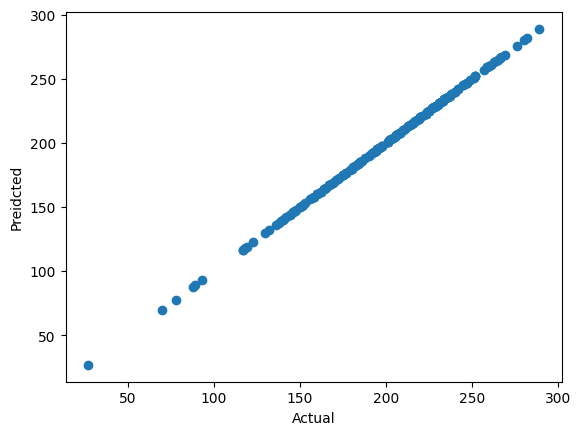

In [119]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Preidcted")

<Axes: xlabel='total_score'>

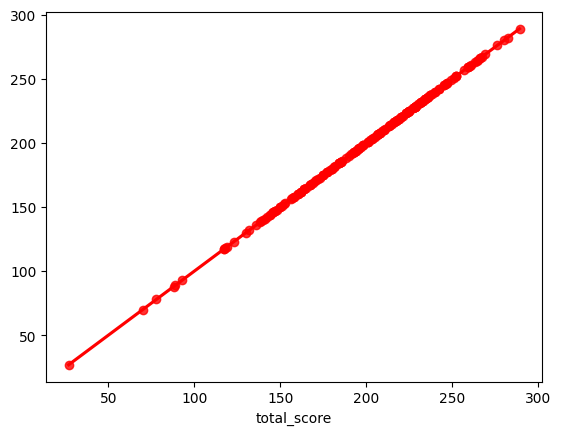

In [120]:
sns.regplot(x=y_test,y=y_pred,color='red')

#### Difference between Actual and Predicted Values

In [121]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,261,261.0,-5.684342e-14
737,192,192.0,5.684342e-14
740,225,225.0,0.000000e+00
660,224,224.0,0.000000e+00
411,245,245.0,-2.842171e-14
...,...,...,...
408,165,165.0,5.684342e-14
332,171,171.0,0.000000e+00
208,231,231.0,0.000000e+00
613,216,216.0,0.000000e+00
